In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
pd.__version__

'1.1.3'

In [2]:
df_labels = pd.read_csv('labels.txt',sep='\n', delimiter=',', header=None )

# Function to remove dublicates from labels.

In [3]:
def uniquify(df_columns):
    df_columns = df_columns.T.iloc[0,:]
    seen = list()

    for item in df_columns:
        fudge = 'hand'
        newitem = item
        
        if newitem in seen:
            newitem = "{}_{}".format(item, fudge)

        seen.append(newitem)
    return seen
        
label_list = uniquify(df_labels)
label_list

['Subject index (1-40)',
 'ECG_original_mean',
 'ECG_original_std',
 'ECG_original_trimmean25',
 'ECG_original_median',
 'ECG_original_skewness',
 'ECG_original_kurtosis',
 'ECG_original_max',
 'ECG_original_min',
 'ECG_original_prctile25',
 'ECG_original_prctile75',
 'ECG_original_geomean(abs)',
 'ECG_original_harmmean',
 'ECG_original_mad',
 'ECG_original_baseline',
 'ECG_RR_window_mean',
 'ECG_RR_window_std',
 'ECG_RR_window_trimmean25',
 'ECG_RR_window_median',
 'ECG_RR_window_skewness',
 'ECG_RR_window_kurtosis',
 'ECG_RR_window_max',
 'ECG_RR_window_min',
 'ECG_RR_window_prctile25',
 'ECG_RR_window_prctile75',
 'ECG_RR_window_geomean(abs)',
 'ECG_RR_window_harmmean',
 'ECG_RR_window_mad',
 'ECG_RR_window_baseline',
 'ECG_amplitude_RR_mean',
 'ECG_amplitude_RR_std',
 'ECG_amplitude_RR_trimmean25',
 'ECG_amplitude_RR_median',
 'ECG_amplitude_RR_skewness',
 'ECG_amplitude_RR_kurtosis',
 'ECG_amplitude_RR_max',
 'ECG_amplitude_RR_min',
 'ECG_amplitude_RR_prctile25',
 'ECG_amplitude_R

In [4]:
df = pd.read_csv('data.txt', header=None, names=label_list, na_values = 'N/A')#, set_flags(allows_duplicate_labels=False))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Columns: 535 entries, Subject index (1-40) to Activity
dtypes: float64(520), int64(14), object(1)
memory usage: 18.3+ MB


In [6]:
df.head()

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis_hand,EDA_Functionals_power_Filt2max_hand,EDA_Functionals_power_Filt2min_hand,EDA_Functionals_power_Filt2prctile25_hand,EDA_Functionals_power_Filt2prctile75_hand,EDA_Functionals_power_Filt2geomean(abs)_hand,EDA_Functionals_power_Filt2harmmean_hand,EDA_Functionals_power_Filt2mad_hand,EDA_Functionals_power_Filt2baseline_hand,Activity
0,1,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,...,1015.36,717032000.0,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0,.0f
1,1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,...,1015.78,705854000.0,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0,.0f
2,1,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,...,1016.16,627018000.0,0.008129,2.25959,15.2312,7.11684,1.25860,1234110.0,3004430.0,.0f
3,1,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,...,1015.61,559748000.0,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0,.0f
4,1,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,...,1015.67,484473000.0,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0,.0f


# Changing the label col from object to numbers.

In [7]:
df.iloc[:,-1].unique()
# array(['\x01.0f', '\x03.0f', '\x02.0f', '\x04.0f'], dtype=object)

for index, rows in df.iterrows():
    if df.loc[index, 'Activity'] == '\x01.0f':
        df.loc[index, 'Activity'] = 1
    elif df.loc[index, 'Activity'] == '\x02.0f':
        df.loc[index, 'Activity'] = 2
    elif df.loc[index, 'Activity'] == '\x03.0f':
        df.loc[index, 'Activity'] = 3
    elif df.loc[index, 'Activity'] == '\x04.0f':
        df.loc[index, 'Activity'] = 4

# Checking for NA

In [8]:
for col in range(df.shape[1]):
    # YOUR CODE HERE
    n_miss = df.isnull().sum(axis=0)
    print('Column {} has {} missing values.'.format(col, n_miss.iloc[col]))
# No NA in dataset.

Column 0 has 0 missing values.
Column 1 has 0 missing values.
Column 2 has 0 missing values.
Column 3 has 0 missing values.
Column 4 has 0 missing values.
Column 5 has 0 missing values.
Column 6 has 0 missing values.
Column 7 has 0 missing values.
Column 8 has 0 missing values.
Column 9 has 0 missing values.
Column 10 has 0 missing values.
Column 11 has 0 missing values.
Column 12 has 0 missing values.
Column 13 has 0 missing values.
Column 14 has 0 missing values.
Column 15 has 0 missing values.
Column 16 has 0 missing values.
Column 17 has 0 missing values.
Column 18 has 0 missing values.
Column 19 has 0 missing values.
Column 20 has 0 missing values.
Column 21 has 0 missing values.
Column 22 has 0 missing values.
Column 23 has 0 missing values.
Column 24 has 0 missing values.
Column 25 has 0 missing values.
Column 26 has 0 missing values.
Column 27 has 0 missing values.
Column 28 has 0 missing values.
Column 29 has 0 missing values.
Column 30 has 0 missing values.
Column 31 has 0 mi

Column 261 has 0 missing values.
Column 262 has 0 missing values.
Column 263 has 0 missing values.
Column 264 has 0 missing values.
Column 265 has 0 missing values.
Column 266 has 0 missing values.
Column 267 has 0 missing values.
Column 268 has 0 missing values.
Column 269 has 0 missing values.
Column 270 has 0 missing values.
Column 271 has 0 missing values.
Column 272 has 0 missing values.
Column 273 has 0 missing values.
Column 274 has 0 missing values.
Column 275 has 0 missing values.
Column 276 has 0 missing values.
Column 277 has 0 missing values.
Column 278 has 0 missing values.
Column 279 has 0 missing values.
Column 280 has 0 missing values.
Column 281 has 0 missing values.
Column 282 has 0 missing values.
Column 283 has 0 missing values.
Column 284 has 0 missing values.
Column 285 has 0 missing values.
Column 286 has 0 missing values.
Column 287 has 0 missing values.
Column 288 has 0 missing values.
Column 289 has 0 missing values.
Column 290 has 0 missing values.
Column 291

Column 525 has 0 missing values.
Column 526 has 0 missing values.
Column 527 has 0 missing values.
Column 528 has 0 missing values.
Column 529 has 0 missing values.
Column 530 has 0 missing values.
Column 531 has 0 missing values.
Column 532 has 0 missing values.
Column 533 has 0 missing values.
Column 534 has 0 missing values.


* Do we have to normalize all data?

# Summary statistics: 

* The first column correspond to the index of the subject. (1 - 40)
* The next 174 attributes are statistics extracted from the ECG signal. 
* The next 151 attributes are features extracted from the TEB signal. 
* The next 104 attributes come from the EDA measured in the arm.
* The next 104 ones from the EDA in the hand. 
* The last attribute is the pattern class, that is, the corresponding activity: 1-neutral, 2-emotional, 3-mental and 4-physical.

Ide:
 * Group by subject
 * Group by Activity 
 * Filter( string detect (median | mean | std) opmærksom på at "fil" findes med de samme.

In [9]:
df.head()

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis_hand,EDA_Functionals_power_Filt2max_hand,EDA_Functionals_power_Filt2min_hand,EDA_Functionals_power_Filt2prctile25_hand,EDA_Functionals_power_Filt2prctile75_hand,EDA_Functionals_power_Filt2geomean(abs)_hand,EDA_Functionals_power_Filt2harmmean_hand,EDA_Functionals_power_Filt2mad_hand,EDA_Functionals_power_Filt2baseline_hand,Activity
0,1,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,...,1015.36,717032000.0,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0,1
1,1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,...,1015.78,705854000.0,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0,1
2,1,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,...,1016.16,627018000.0,0.008129,2.25959,15.2312,7.11684,1.25860,1234110.0,3004430.0,1
3,1,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,...,1015.61,559748000.0,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0,1
4,1,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,...,1015.67,484473000.0,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0,1


# Visualization:

<AxesSubplot:xlabel='Activity', ylabel='value'>

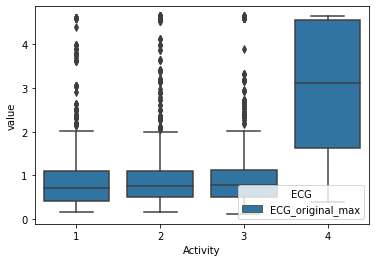

In [10]:
import seaborn as sns

dd=pd.melt(df,id_vars=['Activity'],value_vars=['ECG_original_max'],var_name='ECG')
sns.boxplot(x='Activity',y='value',data=dd,hue='ECG')


<AxesSubplot:xlabel='Activity', ylabel='value'>

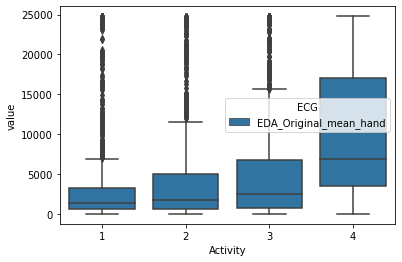

In [11]:
dd=pd.melt(df,id_vars=['Activity'],value_vars=['EDA_Original_mean_hand'],var_name='ECG')
sns.boxplot(x='Activity',y='value',data=dd,hue='ECG')

<AxesSubplot:xlabel='Activity', ylabel='value'>

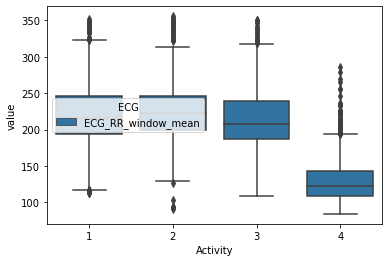

In [12]:
dd=pd.melt(df,id_vars=['Activity'],value_vars=['ECG_RR_window_mean'],var_name='ECG')
sns.boxplot(x='Activity',y='value',data=dd,hue='ECG')

Removed  ECG_p_VFL_kurtosis
Removed  ECG_p_LF_kurtosis
Removed  IT_VLF_kurtosis
Removed  IT_LF_kurtosis_hand


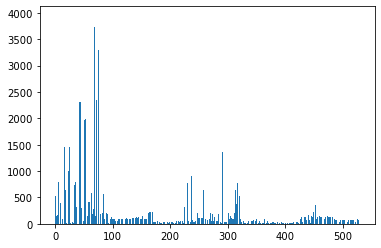

best mean cross-validation score: 0.730
best parameters: {'C': 51}
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       13.638139      6.462166         0.000399        0.000489       1   
1       25.225176      3.581549         0.000793        0.000397      11   
2       36.145022      7.765401         0.000798        0.000399      21   
3       34.054298      6.908090         0.000199        0.000399      31   
4       34.636225      7.009548         0.000799        0.000399      41   
5       42.109176      5.236998         0.000792        0.000396      51   
6       40.002064      7.846592         0.000997        0.000631      61   
7       37.518698      6.200174         0.000798        0.000399      71   
8       37.456503      5.269497         0.000791        0.000396      81   
9       36.642072      4.871483         0.000599        0.000489      91   
10      36.571049      5.190341         0.000799        0.000399     101   
11      46.879679    

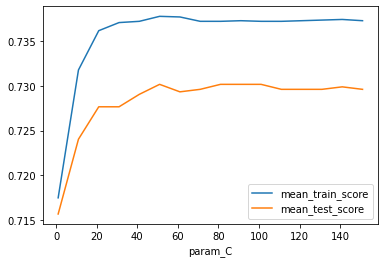

Accuracy: 0.732
Confusion matrix:
[[148  37  39   0]
 [  3 141  77   3]
 [  0  68 153   3]
 [  0   7   3 214]]
              precision    recall  f1-score   support

           1       0.98      0.66      0.79       224
           2       0.56      0.63      0.59       224
           3       0.56      0.68      0.62       224
           4       0.97      0.96      0.96       224

    accuracy                           0.73       896
   macro avg       0.77      0.73      0.74       896
weighted avg       0.77      0.73      0.74       896



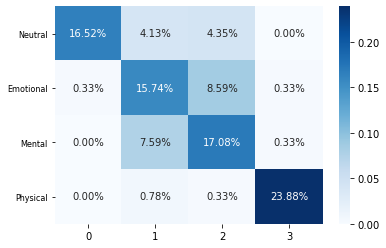

In [45]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV


X=df.iloc[:,0:-1]
y=df.iloc[ :, -1:]
X.drop(['Subject index (1-40)'], axis=1, inplace=True) #Removed subject index

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X)
constant_columns = [column for column in X.columns if column not in X.columns[constant_filter.get_support()]]
for column in constant_columns:
    print("Removed ", column)
    X.drop([column], axis=1, inplace=True)

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(X)

"""
# boxplot of scaled data 
dfX = pd.DataFrame(scaled)
dfy = pd.DataFrame(y)
cdf=dfX.join(dfy)

dd=pd.melt(cdf,id_vars=['Activity'],value_vars=[6],var_name='ECG')
sns.boxplot(x='Activity',y='value',data=dd)

"""

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, stratify=y, random_state=0)

# ANOVA
# 1) anova filter, take best ranked features
anova_filter = SelectKBest(f_classif, k=40)
# learn relationship from training data
anova_filter.fit(X_train, y_train.values.ravel())
# transform train input data
X_train_anova_filter = anova_filter.transform(X_train)
# transform test input data
X_test_anova_filter = anova_filter.transform(X_test)


# what are scores for the features
#for i in range(len(anova_filter.scores_)):
#    print('Feature %d: %f' % (i, anova_filter.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(anova_filter.scores_))], anova_filter.scores_)
pyplot.show()


y_train=y_train.astype('int')
param_grid_lr = {'C': np.arange(1, 160, 10)}  

grid = GridSearchCV(LogisticRegression(max_iter=10000, solver='saga', penalty='l1'), param_grid=param_grid_lr,
                    cv=5, return_train_score=True)
lr=grid.fit(X_train_anova_filter, y_train.values.ravel())

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print(pd.DataFrame(lr.cv_results_))
results=pd.DataFrame(lr.cv_results_)
results.plot('param_C', 'mean_train_score')
results.plot('param_C', 'mean_test_score', ax=plt.gca())
plt.show()


pred = lr.predict(X_test_anova_filter)
y_test=y_test.astype('int')
print("Accuracy: {:.3f}".format(accuracy_score(y_test.values.ravel(), pred)))
print("Confusion matrix:")
conf=confusion_matrix(y_test.values.ravel(), pred)

print(conf)

y_axis_labels = ['Neutral','Emotional','Mental','Physical'] # labels for y-axis

g=sns.heatmap(conf/np.sum(conf), annot=True, 
            fmt='.2%', cmap='Blues', yticklabels=y_axis_labels)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)


print(classification_report(y_test.values.ravel(), pred))
